# Statistical Data Analysis Project

 You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans is more profitable in order to adjust the advertising budget.
 
You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze clients' behavior and determine which prepaid plan is more profitable.

## Description of the plans
Note: Megaline rounds seconds up to minutes, and megabytes to gigabytes. For calls, each individual call is rounded up: even if the call lasted just one second, it will be counted as one minute. For web traffic, individual web sessions are not rounded up. Instead, the total for the month is rounded up. If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes.


## Step 1. Open the data file and study the general information


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from scipy import stats as st
%matplotlib inline

df_calls = pd.read_csv('megaline_calls.csv')
df_internet = pd.read_csv('megaline_internet.csv')
df_messages = pd.read_csv('megaline_messages.csv')
df_plans = pd.read_csv('megaline_plans.csv')
df_users= pd.read_csv('megaline_users.csv')

In [2]:
#checking for null values by writing a function
def get_percent_of_na(df,num):
    count = 0
    df = df.copy()
    s = (df.isna().sum() / df.shape[0])
    for column, percent in zip(s.index,s.values):
        
        num_of_nulls = df[column].isna().sum()
        if num_of_nulls == 0:
            continue
        else:
            count += 1
        print('Column {} has {:.{}%} percent of Nulls, and {} of nulls'.format(column, percent,num,num_of_nulls))
        
    if count !=0:
        print("\033[1m" + 'There are {} columns with NA.'.format(count) + "\033[0m")
    else:
        print()
        print("\033[1m" + 'There are no columns with NA.' + "\033[0m")
    
#a function that provides information about each file
def get_info(df):
    print('Head:')
    print()
    display(df.head())
    print('-' * 100)
    print('Info:')
    print()
    display(df.info())
    print('-' * 100)
    print('Describe:')
    print()
    display(df.describe())
    print('-' * 100)
    display(df.describe(include='object'))
    print()
    print('Columns with nulls:')
    get_percent_of_na(df_calls,2)
    print()
    print('-'*100)
    print('Shape:')
    print(df.shape)
    print('-'*100)
    print('Duplicated:')
    print("\033[1m" + 'We have {} duplicated rows. \n'.format(df.duplicated().sum()) + "\033[0m")

In [3]:
get_info(df_calls)
get_info(df_internet)
get_info(df_messages)
get_info(df_plans)
get_info(df_users)

Head:



,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


----------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


None

----------------------------------------------------------------------------------------------------
Describe:



,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


----------------------------------------------------------------------------------------------------


,id,call_date
count,137735,137735
unique,137735,351
top,1243_64,2018-12-27
freq,1,1091



Columns with nulls:

There are no columns with NA.

----------------------------------------------------------------------------------------------------
Shape:
(137735, 4)
----------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows. 

Head:



,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


----------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


None

----------------------------------------------------------------------------------------------------
Describe:



,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


----------------------------------------------------------------------------------------------------


,id,session_date
count,104825,104825
unique,104825,351
top,1131_183,2018-12-24
freq,1,851



Columns with nulls:

There are no columns with NA.

----------------------------------------------------------------------------------------------------
Shape:
(104825, 4)
----------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows. 

Head:



,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


----------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


None

----------------------------------------------------------------------------------------------------
Describe:



,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


----------------------------------------------------------------------------------------------------


,id,message_date
count,76051,76051
unique,76051,351
top,1131_183,2018-12-28
freq,1,702



Columns with nulls:

There are no columns with NA.

----------------------------------------------------------------------------------------------------
Shape:
(76051, 3)
----------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows. 

Head:



,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


----------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


None

----------------------------------------------------------------------------------------------------
Describe:



,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


----------------------------------------------------------------------------------------------------


,plan_name
count,2
unique,2
top,surf
freq,1



Columns with nulls:

There are no columns with NA.

----------------------------------------------------------------------------------------------------
Shape:
(2, 8)
----------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows. 

Head:



,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


----------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

----------------------------------------------------------------------------------------------------
Describe:



,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


----------------------------------------------------------------------------------------------------


,first_name,last_name,city,reg_date,plan,churn_date
count,500,500,500,500,500,34
unique,458,399,73,266,2,29
top,Jasper,Brock,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-07-12,surf,2018-12-18
freq,3,3,80,5,339,3



Columns with nulls:

There are no columns with NA.

----------------------------------------------------------------------------------------------------
Shape:
(500, 8)
----------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows. 



## Step 2. Prepare the data

Convert the data to the necessary types
Find and eliminate errors in the data

In [4]:
get_id = np.vectorize(lambda x: re.sub('.*_', '' , x))

In [5]:
#change date type to datetime and split into month/day/year columns
def get_info_date(df):
    columns = df.columns.tolist()
    idx = [columns.index(x) for x in columns  if 'date' in x][0]
    
    df[columns[idx]] = pd.to_datetime(df[columns[idx]])
    df['day'] = df[columns[idx]].dt.day_name()
    df['month'] = df[columns[idx]].dt.month_name()
    df['year'] = df[columns[idx]].dt.year
    return df

df_calls.columns

Index(['id', 'user_id', 'call_date', 'duration'], dtype='object')

Explain what errors you found and how you removed them. Note: many calls have a duration of 0.0 minutes. These might be missed calls. Whether or not to preprocess these values is up to you; assess how much their absence would affect the results of your analysis.

For each user, find:
The number of calls made and minutes used per month

In [6]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])
df_calls['id'] = get_id(df_calls['id'])
df_calls = get_info_date(df_calls)
df_calls['call_type'] = np.where(df_calls['duration'] == 0,'Missed call','Connected call')
df_calls.head()

#Calls per use per month
calls_made = df_calls.groupby(['user_id', 'month']).agg({'id':'count'}).rename(columns={'id':'Calls Made'})

#minutes per use per month
minutes_spent = df_calls.groupby(['user_id', 'month']).agg({'duration':'sum'}).rename(columns={'duration':'Minutes Spent'})

For each user, find:
The amount of internet used per month

In [7]:
df_internet = get_info_date(df_internet)
df_internet['id'] = get_id(df_internet['id'])
df_internet.head()

#Traffic per use per month
mb_used = df_internet.groupby(['user_id', 'month']).agg({'mb_used':'sum'}).rename(columns={'mb_used':'Mb Used'})

For each user, find:
The number of text messages sent per month

In [8]:
df_messages['id'] = get_id(df_messages['id'])
df_messages = get_info_date(df_messages)
df_messages.head()

#messages per user per month
messages_sent = df_messages.groupby(['user_id', 'month']).agg({'id':'count'}).rename(columns={'id':'Messages Sent'})

For each user, find:
The volume of data per month

In [9]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'])
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'])
df_users.rename(columns = {'tariff':'plan'}, inplace=True)
df_users.head()


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT


In [10]:
#Plan for each user
plan = df_users[{'user_id', 'plan'}]
plan.head()

,plan,user_id
0,ultimate,1000
1,surf,1001
2,surf,1002
3,surf,1003
4,surf,1004


For each user, find:
The monthly profit from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan)

In [11]:
df_usage = pd.concat([calls_made, minutes_spent, mb_used, messages_sent], axis=1).reset_index().merge(plan,on='user_id')
df_usage.head(20)


,user_id,month,Calls Made,Minutes Spent,Mb Used,Messages Sent,plan
0,1000,December,16.0,116.83,1901.47,11.0,ultimate
1,1001,August,27.0,171.14,6919.15,30.0,surf
2,1001,December,56.0,392.93,19369.18,44.0,surf
3,1001,November,64.0,404.59,18504.30,36.0,surf
4,1001,October,65.0,374.11,22330.49,53.0,surf
5,1001,September,49.0,297.69,13314.82,44.0,surf
6,1002,December,47.0,363.24,14396.24,41.0,surf
7,1002,November,55.0,359.76,19345.08,32.0,surf
8,1002,October,11.0,54.13,6552.01,15.0,surf
9,1003,December,149.0,1041.00,27044.14,50.0,surf


#### Conclusion
    
This goes over the amount of calls, minutes spent, MB used and messages sent according to user id for the top 20 months in the data. This shows a snippet of the data by user and month



In [12]:
def fill_na(df):
    if df.isna().sum().sum() !=0:
        df.fillna(0,inplace=True)
    return df

In [13]:
#function to calculate overage of plan limit
def calculate_overage(df,df_plan):
    df=fill_na(df)
    
    over_minutes = []
    over_messages = []
    over_traffic = []
    
    #ultimate allowances
    ultimate_messages = 1000 #Max Texts
    ultimate_traffic = 30720 #Max 30Gb Data
    ultimate_minutes = 3000 #Max Minutes
    
    #Surf Allowances
    surf_message = 50 #Max Texts
    surf_traffic = 15350 #Max 15Gb Data
    surf_minutes = 500 #Max Minutes
    
    #tuple of every row
    for min_spent, mb_used, messages_sent, plan in zip(df['Minutes Spent'], df['Mb Used'], df['Messages Sent'], df['plan']):
        if plan == 'ultimate':
            if min_spent <= ultimate_minutes:
                over_minutes.append(0)
            else:
                over_minutes.append(min_spent-ultimate_minutes)
            
            if mb_used <= ultimate_traffic:
                over_traffic.append(0)
            else:
                over_traffic.append(mb_used-ultimate_traffic)
        
            if messages_sent <= ultimate_messages:
                over_messages.append(0)
            else:
                over_messages.append(messages_sent-ultimate_messages)
            
        else: #surf case
            if min_spent <= surf_minutes:
                over_minutes.append(0)
            else:
                over_minutes.append(min_spent-surf_minutes)
            
            if mb_used <= surf_traffic:
                over_traffic.append(0)
            else:
                over_traffic.append(mb_used - surf_traffic)
        
            if messages_sent <= surf_message:
                over_messages.append(0)
            else:
                over_messages.append(messages_sent-surf_message)
      
    
    return np.ceil(over_minutes), np.ceil(over_traffic), np.ceil(over_messages)


In [14]:
df_usage['over_minutes'],df_usage['over_traffic'],df_usage['over_messages'] = calculate_overage(df_usage, df_plans)
df_usage.head()

,user_id,month,Calls Made,Minutes Spent,Mb Used,Messages Sent,plan,over_minutes,over_traffic,over_messages
0,1000,December,16.0,116.83,1901.47,11.0,ultimate,0.0,0.0,0.0
1,1001,August,27.0,171.14,6919.15,30.0,surf,0.0,0.0,0.0
2,1001,December,56.0,392.93,19369.18,44.0,surf,0.0,4020.0,0.0
3,1001,November,64.0,404.59,18504.30,36.0,surf,0.0,3155.0,0.0
4,1001,October,65.0,374.11,22330.49,53.0,surf,0.0,6981.0,3.0


#### Conclusion
this provides information on calculating the overages of data usage by traffic, messages, or minutes


In [15]:
 #The monthly profit from each user
 
def calc_revenue(df, df_plan):
    df = fill_na(df)
    
    revenue = []
    user_sum = 0
    
    #ultimate allowance and costs
    ultimate_plan_cost = 70
    ultimate_message_cost = .01
    ultimate_traffic_cost = 7
    ultimate_minutes_cost = .01
    
    #surf allowance and costs
    surf_plan_cost = 20
    surf_message_cost = .03
    surf_traffic_cost = 10
    surf_minutes_cost = .03
    
    for over_minutes, over_traffic, over_messages, plan in zip(df['over_minutes'], df['over_traffic'], df['over_messages'], df['plan']):
        if plan == 'ultimate':
            user_sum += ultimate_plan_cost
            user_sum += ultimate_message_cost * over_messages
            user_sum += ultimate_traffic_cost * (over_traffic / 1024)
            user_sum += ultimate_minutes_cost * over_minutes
        else:
            user_sum += surf_plan_cost
            user_sum += surf_message_cost * over_messages
            user_sum += surf_traffic_cost * (over_traffic / 1024)
            user_sum += surf_minutes_cost * over_minutes
        revenue.append(user_sum)
        user_sum = 0
    return revenue

In [16]:
df_usage['revenue'] = calc_revenue(df_usage, df_plans)
display(df_usage.head(20))
df_usage['revenue'].mean()

,user_id,month,Calls Made,Minutes Spent,Mb Used,Messages Sent,plan,over_minutes,over_traffic,over_messages,revenue
0,1000,December,16.0,116.83,1901.47,11.0,ultimate,0.0,0.0,0.0,70.000000
1,1001,August,27.0,171.14,6919.15,30.0,surf,0.0,0.0,0.0,20.000000
2,1001,December,56.0,392.93,19369.18,44.0,surf,0.0,4020.0,0.0,59.257812
3,1001,November,64.0,404.59,18504.30,36.0,surf,0.0,3155.0,0.0,50.810547
4,1001,October,65.0,374.11,22330.49,53.0,surf,0.0,6981.0,3.0,88.263828
5,1001,September,49.0,297.69,13314.82,44.0,surf,0.0,0.0,0.0,20.000000
6,1002,December,47.0,363.24,14396.24,41.0,surf,0.0,0.0,0.0,20.000000
7,1002,November,55.0,359.76,19345.08,32.0,surf,0.0,3996.0,0.0,59.023438
8,1002,October,11.0,54.13,6552.01,15.0,surf,0.0,0.0,0.0,20.000000
9,1003,December,149.0,1041.00,27044.14,50.0,surf,541.0,11695.0,0.0,150.438984


61.991877078336195

#### Conclusion
We can see here that most of the overages are used for users that have the surf plan according to the information listed in over minutes, over messages and over traffic columns. Revenue provides information on how much income Megaline is making on these users and how many more of these overages results in a greater increase in revenue the highest being a mean of 150 for the first 20 rows by user and month. 


## Step 3. Analyze the data
Describe the customers' behavior. Find the minutes, texts, and volume of data the users of each plan require per month. Calculate the mean, dispersion, and standard deviation. Plot histograms. Describe the distributions.

In [17]:
df_usage_surf = df_usage.query('plan == "surf"')[['user_id', 'month', 'Minutes Spent', 'Mb Used', 'Messages Sent', 'revenue']]
df_usage_ultimate = df_usage.query('plan == "ultimate"')[['user_id', 'month', 'Minutes Spent', 'Mb Used', 'Messages Sent', 'revenue']]

In [18]:
display(df_usage_surf.sort_values(by='revenue', ascending=False).head())
df_usage_surf.describe()

,user_id,month,Minutes Spent,Mb Used,Messages Sent,revenue
1755,1379,December,1045.24,70931.59,126.0,581.452969
569,1121,December,0.00,66863.89,97.0,524.476406
1357,1292,December,132.65,52034.66,0.0,378.251953
1356,1292,August,304.67,51809.35,0.0,376.054688
1126,1240,August,1038.88,49950.58,15.0,374.070391


,user_id,Minutes Spent,Mb Used,Messages Sent,revenue
count,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000
mean,1242.755245,404.762390,16558.283490,31.159568,57.357688
std,139.227939,221.664397,8013.513327,33.566717,53.766190
min,1001.000000,0.000000,0.000000,0.000000,20.000000
25%,1120.000000,255.470000,11986.520000,3.000000,20.000000
50%,1245.000000,401.760000,16829.310000,24.000000,36.757812
75%,1358.000000,543.680000,20999.610000,47.000000,76.953125
max,1499.000000,1431.220000,70931.590000,266.000000,581.452969


In [19]:
display(df_usage_ultimate.sort_values(by='revenue', ascending=False).head())
df_usage_ultimate.describe()

,user_id,month,Minutes Spent,Mb Used,Messages Sent,revenue
103,1028,October,34.02,46595.33,73.0,178.527344
2239,1490,December,347.35,46215.51,0.0,175.929688
135,1038,December,444.66,45020.31,113.0,167.760742
102,1028,November,64.74,42952.59,77.0,153.624023
95,1028,August,71.55,40388.21,74.0,136.096680


,user_id,Minutes Spent,Mb Used,Messages Sent,revenue
count,720.000000,720.000000,720.000000,720.000000,720.000000
mean,1253.330556,406.193083,17214.699694,37.551389,72.116292
std,150.915644,227.246499,7851.897435,34.767179,10.769582
min,1000.000000,0.000000,0.000000,0.000000,70.000000
25%,1126.000000,246.290000,12666.955000,7.000000,70.000000
50%,1241.500000,398.585000,16858.340000,30.000000,70.000000
75%,1401.000000,532.227500,21014.527500,61.000000,70.000000
max,1497.000000,1292.090000,46595.330000,166.000000,178.527344


  #### Data specific to users of the Ultimate plan related to revenue 

In [20]:
def plot_hist(df1,df2, column):
    ax = df1.hist(column=column,density=True, bins=50)
    df2.hist(column=column,density=True, bins=100, alpha=0.4, ax=ax)
    plt.legend(['surf_plan', 'ultimate_plan'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C31366E1F0>],
      dtype=object)

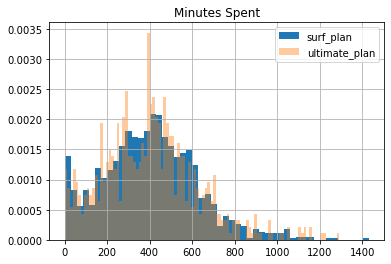

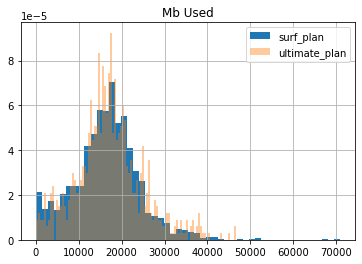

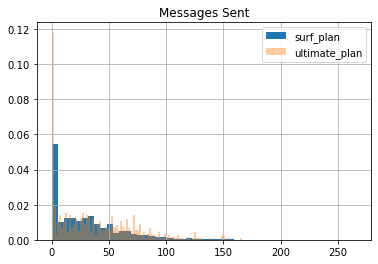

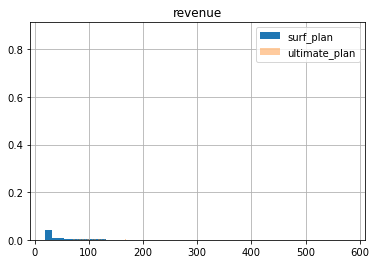

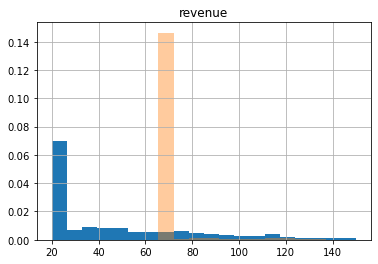

In [21]:
plot_hist(df_usage_surf, df_usage_ultimate, 'Minutes Spent')
plot_hist(df_usage_surf, df_usage_ultimate, 'Mb Used')
plot_hist(df_usage_surf, df_usage_ultimate, 'Messages Sent')
plot_hist(df_usage_surf, df_usage_ultimate, 'revenue')

#displaying revenues again since bins=50 is too high for histogram
display(df_usage_ultimate.hist(column='revenue',density=True, bins=20, range = (20,150), 
                               alpha=0.4,ax = df_usage_surf.hist(column='revenue',density=True, bins=20, range = (20,150))))

In [23]:
month_heirarchy = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

df_usage['month'] = pd.Categorical(df_usage['month'], month_heirarchy)
df_usage.dtypes

user_id             int64
month            category
Calls Made        float64
Minutes Spent     float64
Mb Used           float64
Messages Sent     float64
plan               object
over_minutes      float64
over_traffic      float64
over_messages     float64
revenue           float64
dtype: object

In [24]:
group = df_usage.groupby(['plan', 'month']).agg({'Minutes Spent':'sum','Mb Used':'sum', "Messages Sent": 'sum', 'revenue':'sum'})
group

Minutes Spent     Mb Used  Messages Sent       revenue
plan     month                                                            
surf     January           385.68     9749.72           21.0     40.000000
         February         2527.66   109609.59          108.0    297.480625
         March            7152.31   306945.12          351.0   1003.493672
         April           16619.00   599210.15          870.0   1940.810859
         May             29033.10  1073099.33         1849.0   3495.136484
         June            39499.26  1484248.33         2454.0   4459.835000
         July            51367.31  2030815.67         3271.0   7167.749844
         August          62721.48  2720843.68         4662.0   9835.435859
         September       75852.46  3218737.67         5968.0  10667.662109
         October         96149.09  4102786.41         8020.0  14626.279922
         November       113086.75  4624009.00         9165.0  15563.112500
         December       142297.14  5766125.26        12275.0  21126.646797
ultimate January           732.65    27672.37           62.0    280.000000
         February         2659.03   119901.66          151.0    490.000000
         March            3428.42   219858.22          243.0    880.721680
         April            6646.67   338554.75          463.0   1528.208008
         May             11126.28   482109.99          931.0   2044.957031
         June            16441.12   720882.29         1379.0   3359.425781
         July            23822.27   964339.92         1937.0   4239.176758
         August          28206.51  1264845.13         2732.0   5160.305664
         September       35542.71  1459408.78         3259.0   6175.879883
         October         45067.81  1866930.66         4181.0   7641.744141
         November        53400.65  2163278.04         4903.0   9093.375977
         December        65384.90  2766801.97         6796.0  11029.935547

In [25]:
def plot_df(group_df, group, column, title):
    plt.figure(figsize=(10,5))
    group_df.xs(group[0])[column].plot()
    group_df.xs(group[1])[column].plot()
    plt.title(title)
    plt.legend(['Surf'+" "+column,'Ultimate' +" "+column])
    plt.show()

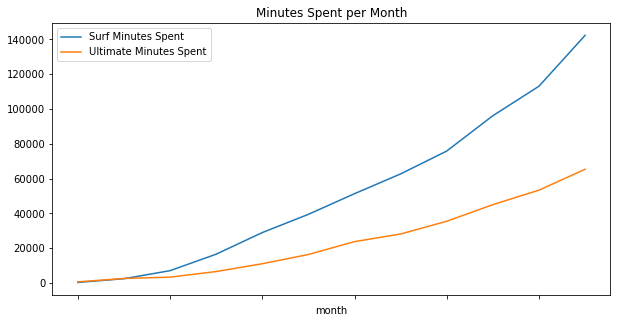

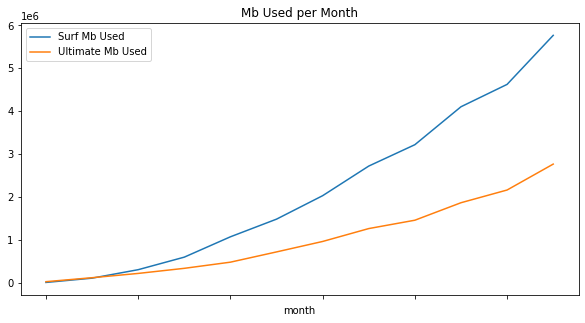

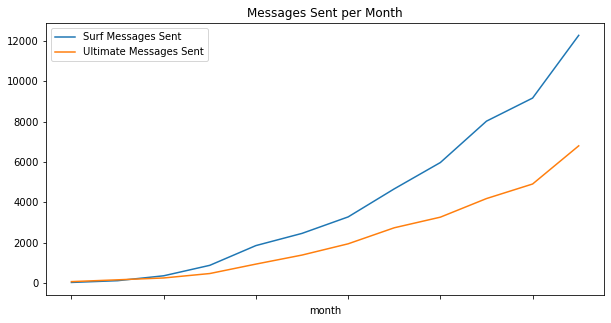

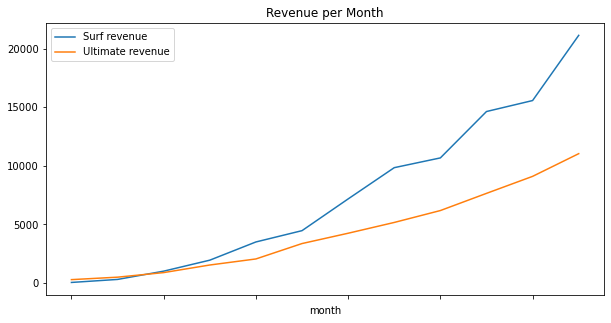

In [26]:
plot_df(group,['surf','ultimate'], 'Minutes Spent', 'Minutes Spent per Month')
plot_df(group,['surf','ultimate'], 'Mb Used', 'Mb Used per Month')
plot_df(group,['surf','ultimate'], 'Messages Sent', 'Messages Sent per Month')
plot_df(group,['surf','ultimate'], 'revenue', 'Revenue per Month')

#### Conclusion of Step 3

- Surf Plan users use more data, minutes and messages across the board. They also generate more revenue
- Based on usage statistics, Surf Users have higher maximums than Ultimate users

### Conclusion
According to the pivot chart above and the data plotted on the line chart surf users resulted in more revenue (Surf users 21126 in overages compared to Ultimate users generating 11029 in revenue for Megaline. These revenue generations are based on overages from the customers. The graphs demonstrate this as well based on the steep incline for Surf users in all 3 categories , messages, megabyte and minutes. This correlates to the revenue. The beginning of the year is the start of the plan so this is statistically the same information throught the data. 

## Step 4. Test the hypotheses
The average profit from users of Ultimate and Surf calling plans differs.


- Null Hypothesis = Average profit from users Ultimate and Surft plans Do Not Differ
- Alternative Hypothesis = Profit for both plans Do Differ

In [27]:
sample_surf = df_usage.groupby(['plan'])['revenue'].get_group('surf')
sample_ultimate = df_usage.groupby(['plan'])['revenue'].get_group('ultimate')

print(sample_surf.mean(), sample_ultimate.mean())

57.357688284726535 72.11629231770833


In [28]:
alpha = .05
results = st.ttest_ind(sample_surf, sample_ultimate)

print('pvalue:', results.pvalue)
print('alpha:', alpha)
if results.pvalue < alpha:
    print("We reject the null hypothesis.")
else:
    print("We cannot reject the null hypothesis.")

pvalue: 4.007963166530244e-13
alpha: 0.05
We reject the null hypothesis.


 Average profit of users in NY and NJ is different than other users 

In [29]:
ny_nj_users_bool = df_users['city'].apply(lambda x: True if "NY-NJ" in x else False)
ny_nj_users = df_users[ny_nj_users_bool]['user_id'].values.tolist()

sample_ny_nj = df_usage[df_usage['user_id'].isin(ny_nj_users)]['revenue']
sample_other = df_usage[df_usage['user_id'].isin(ny_nj_users)]['revenue']

sample_ny_nj.mean(), sample_other.mean()

(57.243106038627324, 57.243106038627324)

In [30]:
alpha = .05
results = st.ttest_ind(sample_ny_nj, sample_other)

print('pvalue:', results.pvalue)
print('alpha:', alpha)
if results.pvalue < alpha:
    print("We reject the null hypothesis.")
else:
    print("We cannot reject the null hypothesis.")

pvalue: 1.0
alpha: 0.05
We cannot reject the null hypothesis.


> alternative hypothesis demonstrates that average profit for New York and New Jersey users is not the same as users in other regions. Users from other regions are more profitable based on the average of the values

an alpha of 5% is a statistically significant level because it is 2.5% on each side of the probability of the mean. This is why I selected it.

## Step 5. Write an overall conclusion

- Users of the Surf plans overuse plans compare to Ultimate users
- Evaluating the usage of the Surf Plan users will allow our organization to attract them to services that use more data to generate more revenue
- Users in New York and New Jersey generated less revenue on average compared to other regions. Cost of living perhaps could be a reason for this. 

In [31]:
group = df_usage.groupby(['plan']).agg({'Minutes Spent':'sum','Mb Used':'sum', "Messages Sent": 'sum', 'revenue':'sum'})
group

,Minutes Spent,Mb Used,Messages Sent,revenue
plan,,,,
surf,636691.24,26046179.93,49014.0,90223.643672
ultimate,292459.02,12394583.78,27037.0,51923.730469
